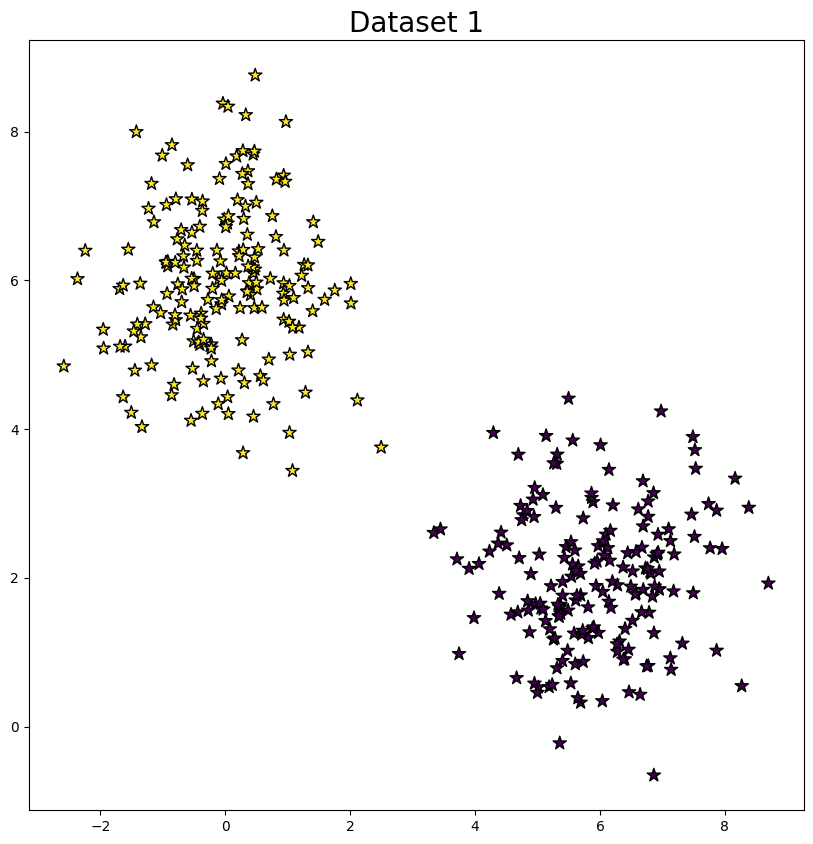

Dataset 1  - Validation - Accuracy of Validation with k=1 100.0
Dataset 1  - Validation - Accuracy of Validation with k=7 100.0
Dataset 1  - Validation - Accuracy of Validation with k=15 100.0
Dataset 1  - Test - Accuracy of Test with k=1 100.0
Dataset 1  - Test - Accuracy of Test with k=7 100.0
Dataset 1  - Test - Accuracy of Test with k=15 100.0


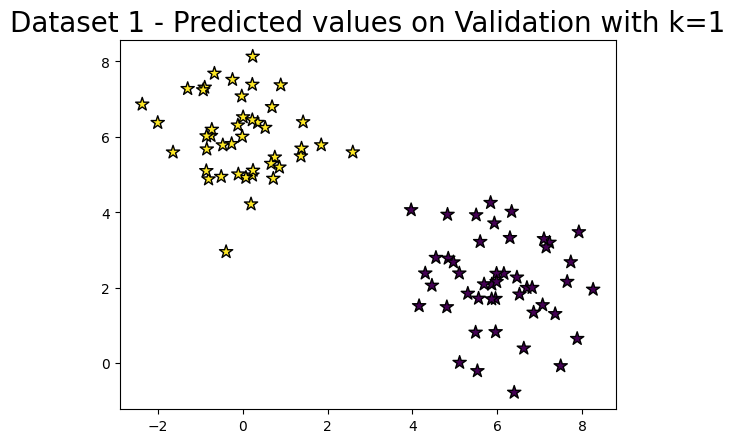

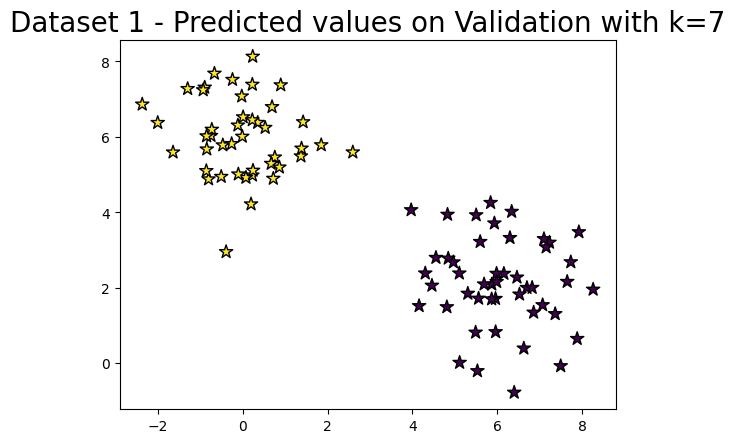

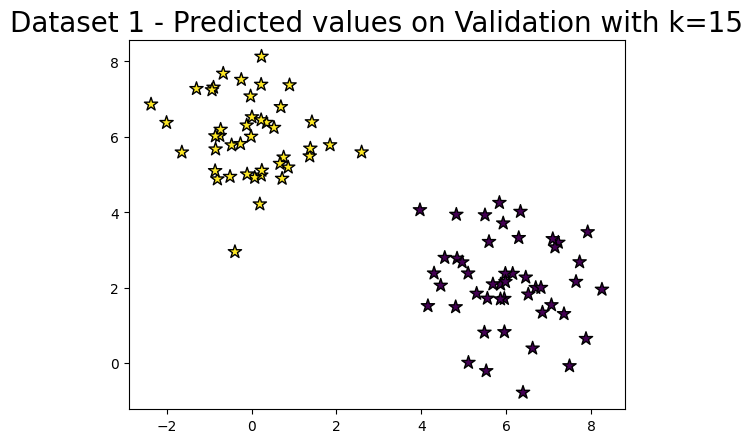

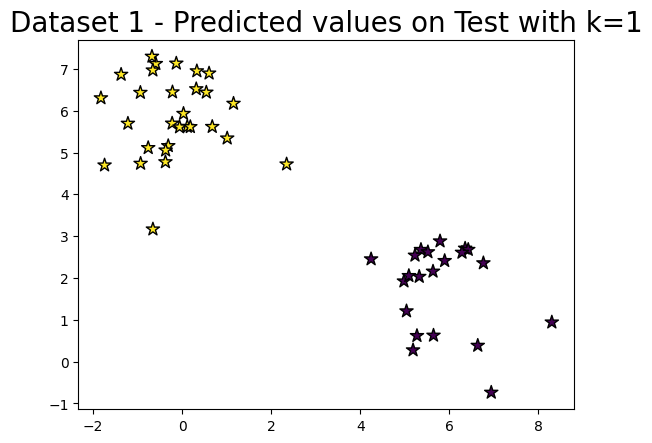

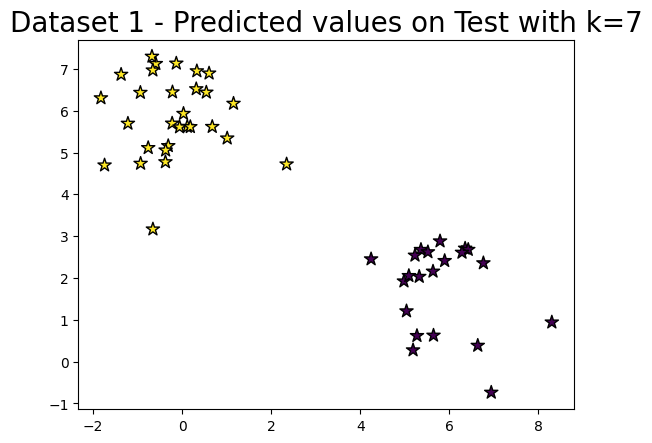

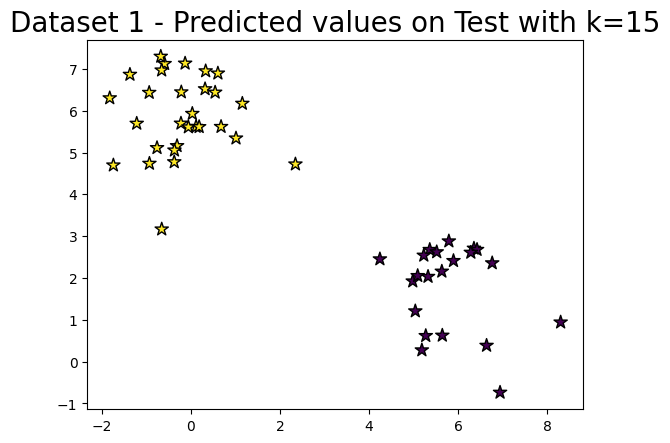

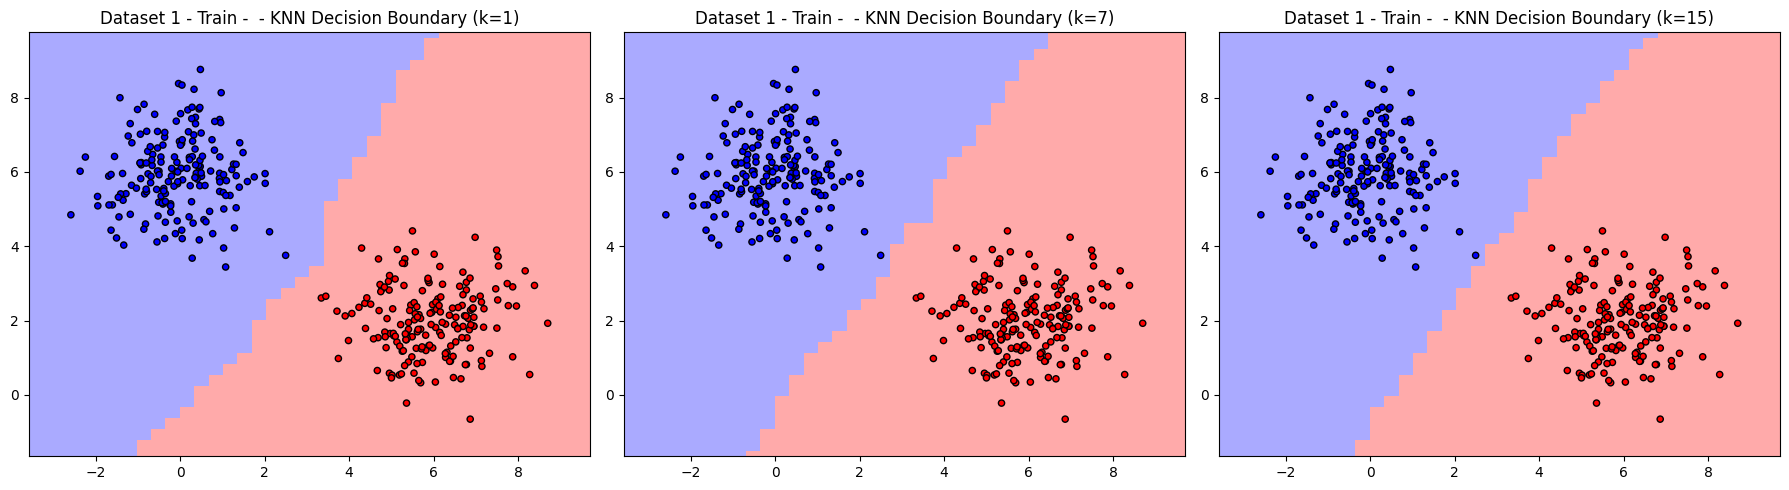

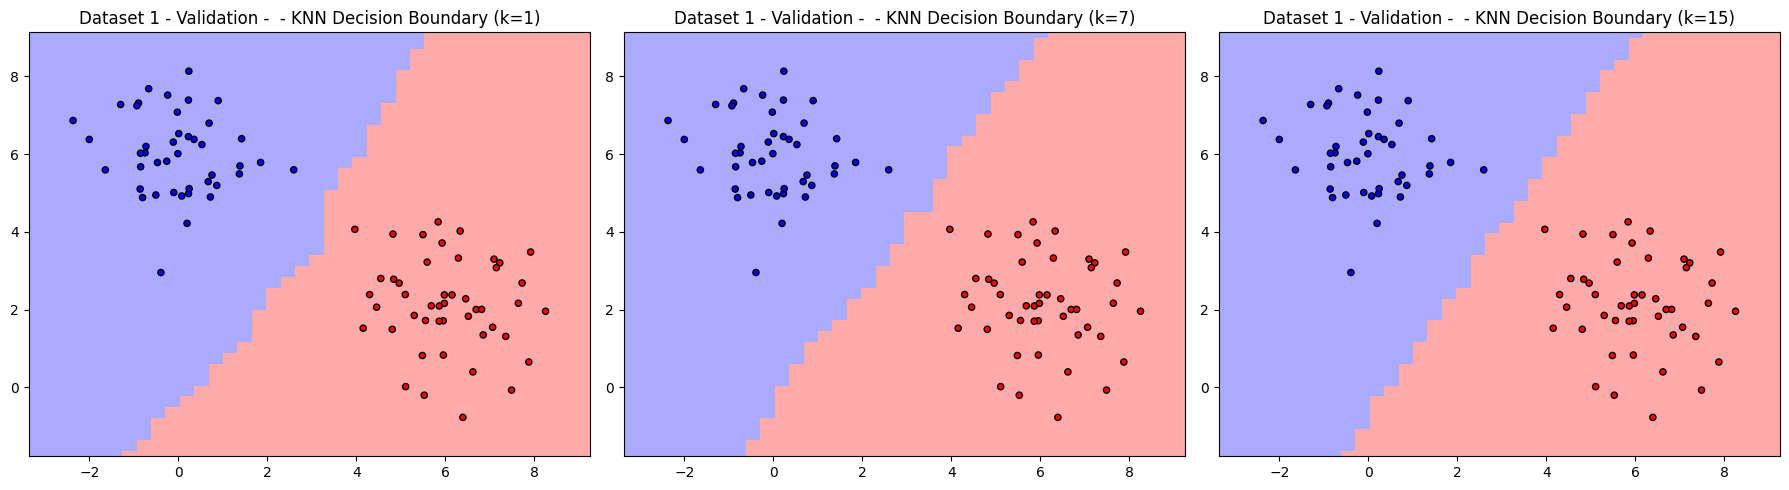

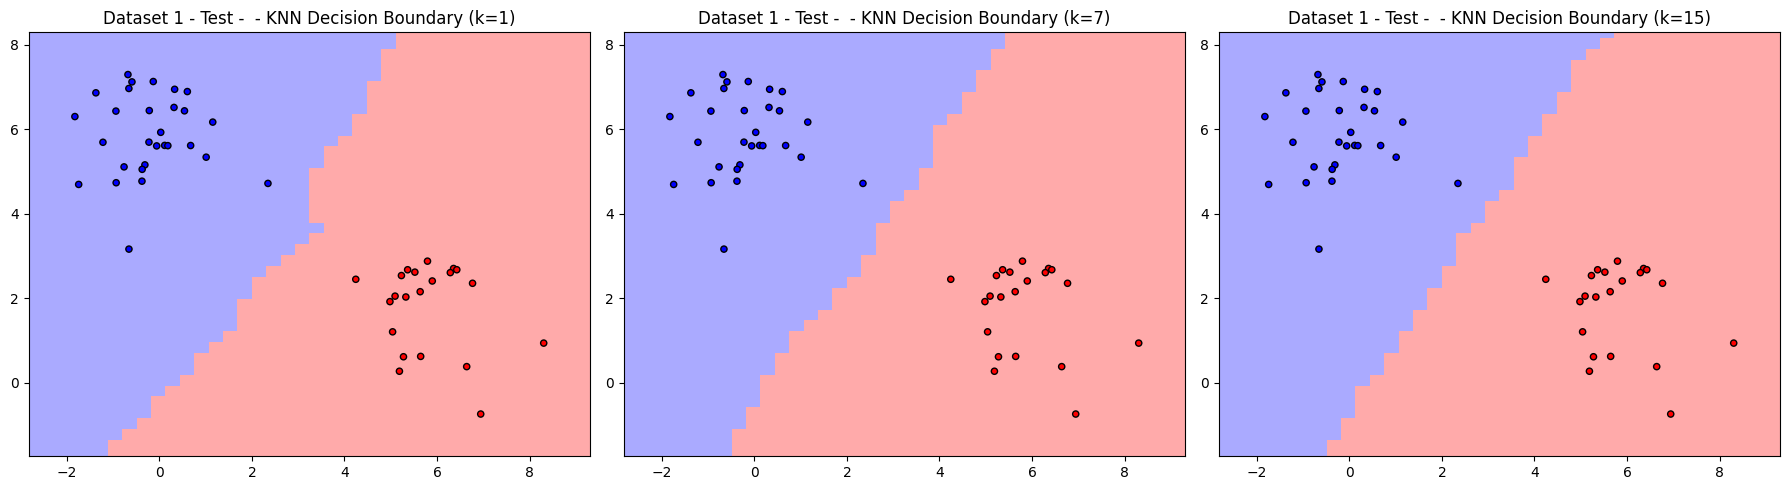

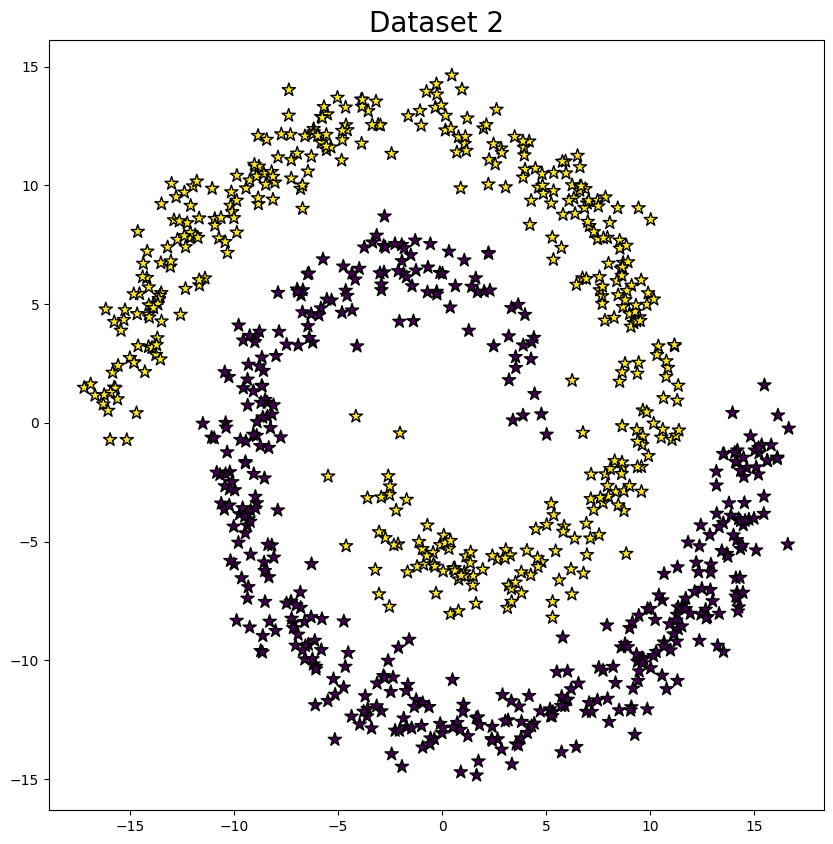

Dataset 2  - Validation - Accuracy of Validation with k=1 100.0
Dataset 2  - Validation - Accuracy of Validation with k=7 99.57983193277312
Dataset 2  - Validation - Accuracy of Validation with k=15 99.57983193277312
Dataset 2  - Test - Accuracy of Test with k=1 100.0
Dataset 2  - Test - Accuracy of Test with k=7 100.0
Dataset 2  - Test - Accuracy of Test with k=15 99.16666666666667


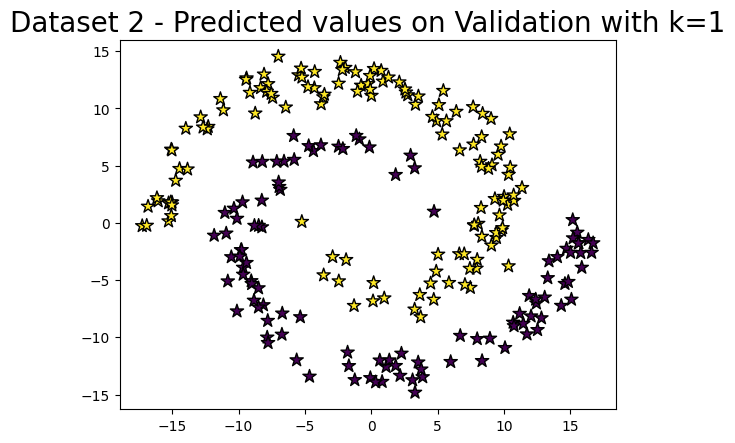

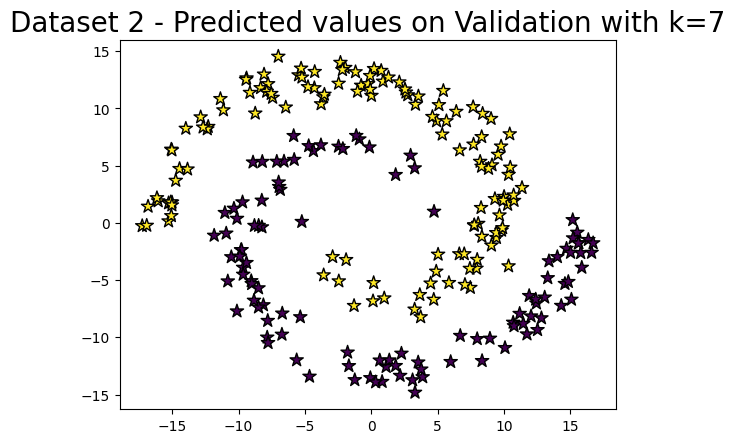

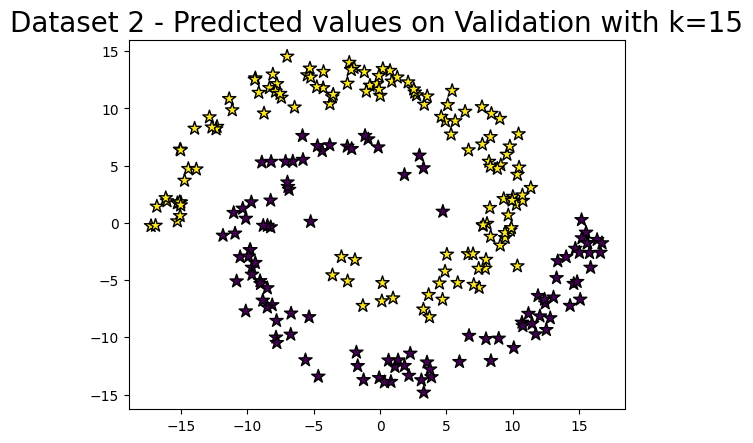

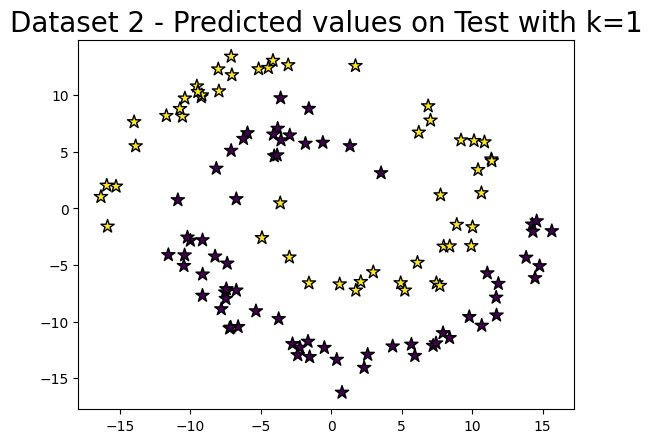

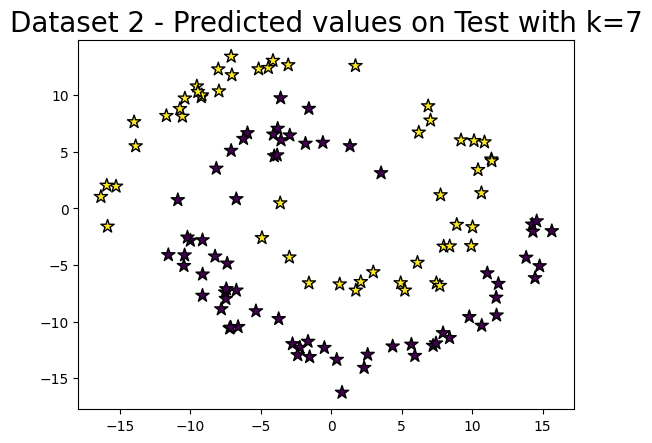

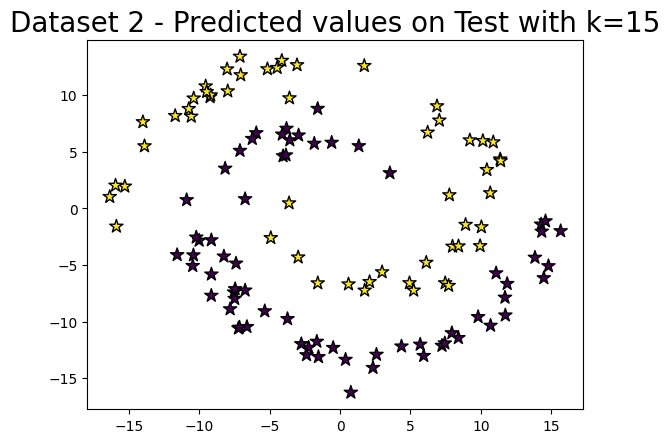

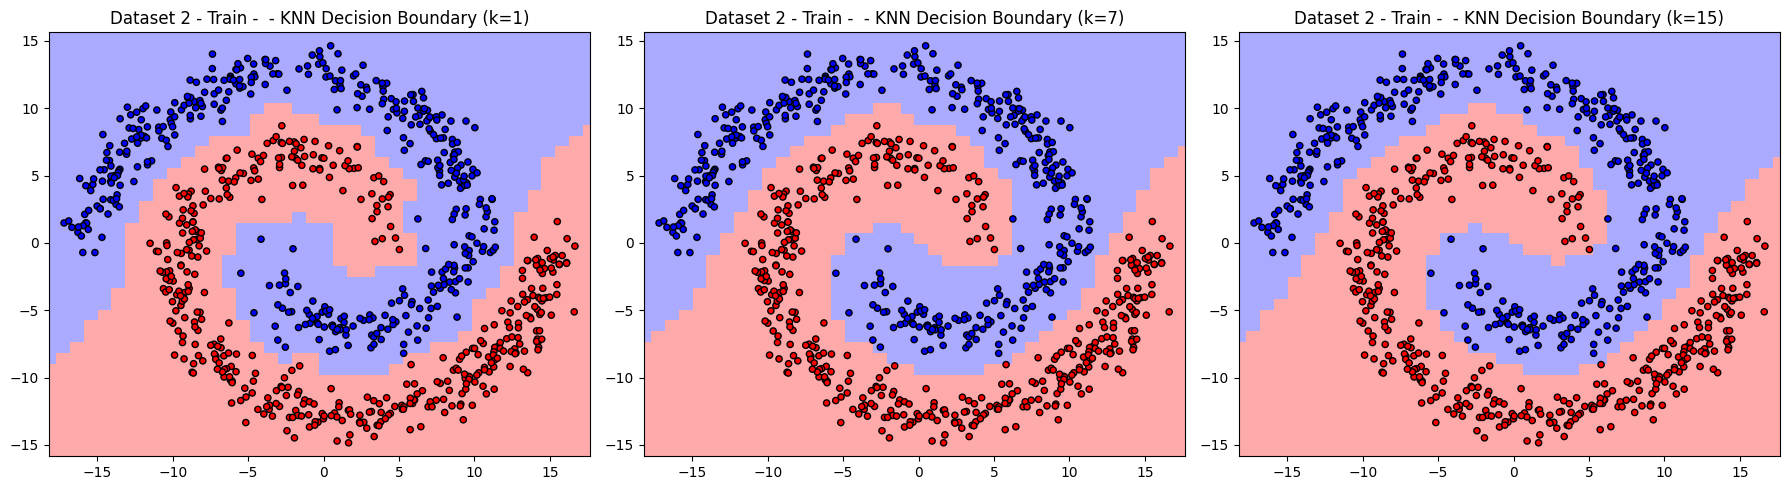

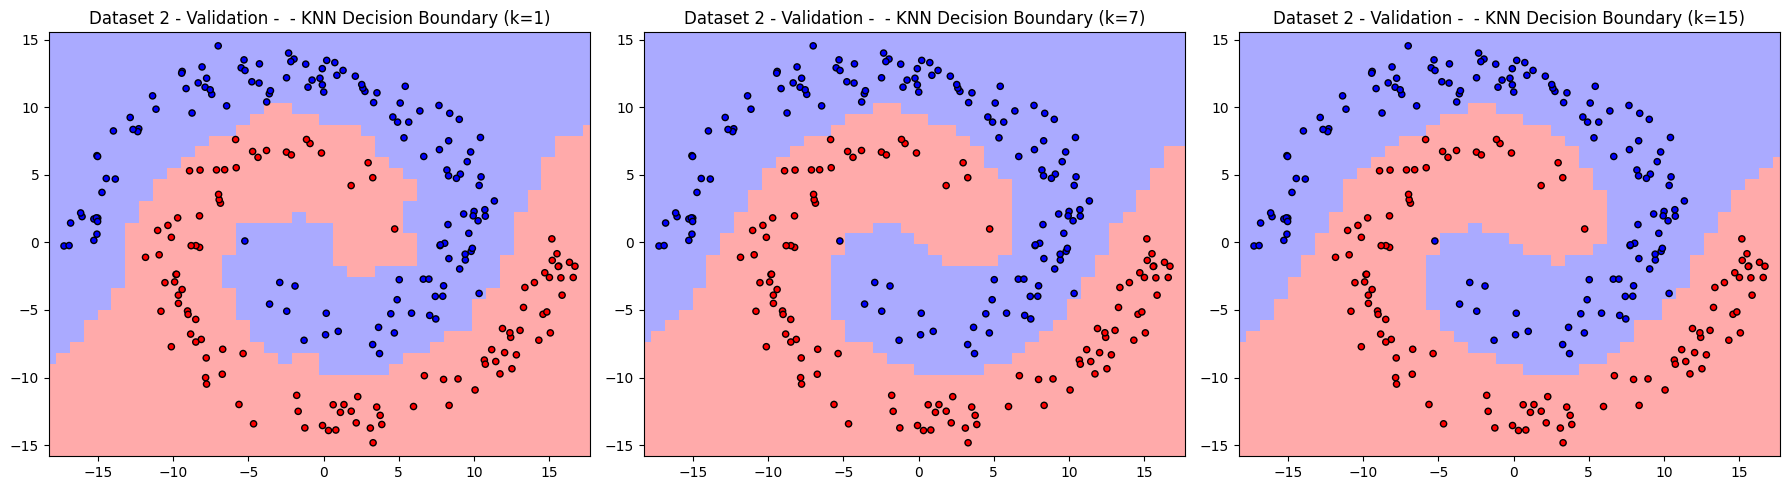

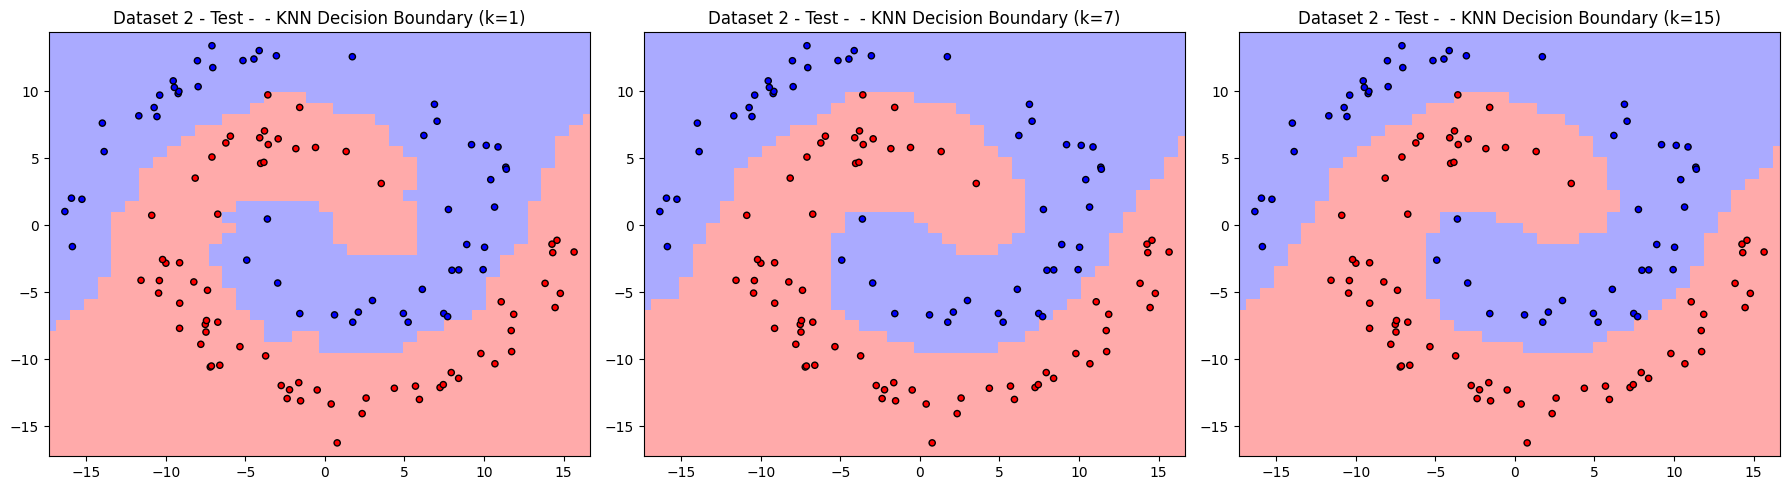

Dataset 3  - Validation - Accuracy of Validation with k=1 59.05905905905906
Dataset 3  - Validation - Accuracy of Validation with k=7 61.46146146146146
Dataset 3  - Validation - Accuracy of Validation with k=15 63.36336336336337
Dataset 3  - Test - Accuracy of Test with k=1 51.903807615230455
Dataset 3  - Test - Accuracy of Test with k=7 62.124248496993985
Dataset 3  - Test - Accuracy of Test with k=15 63.126252505010015


In [3]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


class KNNClassifier:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
            nearest_indices = np.argsort(distances)[: self.n_neighbors]
            nearest_labels = [self.y_train[i] for i in nearest_indices]
            pred_label = max(set(nearest_labels), key=nearest_labels.count)
            y_pred.append(pred_label)

        return y_pred


def accuracy_score(y_true, y_pred):
    if len(y_true) != len(y_pred):
        raise ValueError("Lengths of y_true and y_pred must be equal")

    num_correct = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    accuracy = num_correct / len(y_true)

    return accuracy


def plot_decision_boundary(X, y, classifier, n_neighbors, ax, dataset):
    N = 40

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x_range = np.linspace(x_min, x_max, N)
    y_range = np.linspace(y_min, y_max, N)
    xx, yy = np.meshgrid(x_range, y_range)

    Z_list = []

    for point in np.c_[xx.ravel(), yy.ravel()]:
        prediction = classifier.predict(np.array([point]))
        Z_list.append(prediction)

    Z = np.array(Z_list)

    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
    ax.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=ListedColormap(["#FF0000", "#00FF00", "#0000FF"]),
        edgecolors="k",
        s=20,
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f"{dataset} - KNN Decision Boundary (k={n_neighbors})")


def read_dataset_1(current_directory, folder_number):
    # regression_dataset_1_path=current_directory+ "/Datasets_for_A1/Classification/Dataset 1/" + folder_number + "/"
    regression_dataset_1_path = (
        "/home/dipendu/programs/mtech_2023/ml/ass1/Datasets_for_A1/Classification/Dataset 1/"
        + folder_number
        + "/"
    )

    regression_dataset_1_Train = (
        regression_dataset_1_path + "Train-" + folder_number + ".csv"
    )
    df = pd.read_csv(regression_dataset_1_Train)
    data = df.to_numpy()
    train_x = data[:, 1:3]
    train_y = data[:, 3]

    regression_dataset_1_Validation = (
        regression_dataset_1_path + "Val-" + folder_number + ".csv"
    )
    df = pd.read_csv(regression_dataset_1_Validation)
    data = df.to_numpy()
    val_x = data[:, 1:3]
    val_y = data[:, 3]

    regression_dataset_1_Test = (
        regression_dataset_1_path + "Test-" + folder_number + ".csv"
    )
    df = pd.read_csv(regression_dataset_1_Test)
    data = df.to_numpy()
    test_x = data[:, 1:3]
    test_y = data[:, 3]

    return train_x, train_y, val_x, val_y, test_x, test_y


def read_dataset_2(current_directory, folder_number):
    # regression_dataset_2_path=current_directory+ "/Datasets_for_A1/Classification/Dataset 2/" + folder_number + "/"
    regression_dataset_2_path = (
        "/home/dipendu/programs/mtech_2023/ml/ass1/Datasets_for_A1/Classification/Dataset 2/"
        + folder_number
        + "/"
    )

    regression_dataset_2_Train = (
        regression_dataset_2_path + "Train-" + folder_number + ".csv"
    )
    df = pd.read_csv(regression_dataset_2_Train)
    data = df.to_numpy()
    train_x = data[:, 1:3]
    train_y = data[:, 3]

    regression_dataset_2_Validation = (
        regression_dataset_2_path + "Val-" + folder_number + ".csv"
    )
    df = pd.read_csv(regression_dataset_2_Validation)
    data = df.to_numpy()
    val_x = data[:, 1:3]
    val_y = data[:, 3]

    regression_dataset_2_Test = (
        regression_dataset_2_path + "Test-" + folder_number + ".csv"
    )
    df = pd.read_csv(regression_dataset_2_Test)
    data = df.to_numpy()
    test_x = data[:, 1:3]
    test_y = data[:, 3]

    return train_x, train_y, val_x, val_y, test_x, test_y


def read_dataset_3(current_directory, folder_number):
    # regression_dataset_2_path=current_directory+ "/Datasets_for_A1/Classification/Dataset 3/" + folder_number + "/"
    regression_dataset_3_path = (
        "/home/dipendu/programs/mtech_2023/ml/ass1/Datasets_for_A1/Classification/Dataset 3/"
        + folder_number
        + "/"
    )

    regression_dataset_3_Train_data = regression_dataset_3_path + "train_data.csv"
    df = pd.read_csv(regression_dataset_3_Train_data)
    data = df.to_numpy()
    train_x = data

    regression_dataset_3_Train_label = regression_dataset_3_path + "train_label.csv"
    df = pd.read_csv(regression_dataset_3_Train_label)
    data = df.to_numpy()
    train_y = data[:, 0]

    regression_dataset_3_Validation_data = regression_dataset_3_path + "val_data.csv"
    df = pd.read_csv(regression_dataset_3_Validation_data)
    data = df.to_numpy()
    val_x = data

    regression_dataset_3_Validation_label = regression_dataset_3_path + "val_label.csv"
    df = pd.read_csv(regression_dataset_3_Validation_label)
    data = df.to_numpy()
    val_y = data[:, 0]

    regression_dataset_3_Test_data = regression_dataset_3_path + "test_data.csv"
    df = pd.read_csv(regression_dataset_3_Test_data)
    data = df.to_numpy()
    test_x = data

    regression_dataset_3_Test_label = regression_dataset_3_path + "test_label.csv"
    df = pd.read_csv(regression_dataset_3_Test_label)
    data = df.to_numpy()
    test_y = data[:, 0]

    return train_x, train_y, val_x, val_y, test_x, test_y


def plot_input_data(x, y, plot_title):
    plt.style.use("default")
    plt.figure(figsize=(10, 10))
    plt.scatter(x[:, 0], x[:, 1], c=y, marker="*", s=100, edgecolors="black")
    plt.title(plot_title, fontsize=20)
    plt.show()


def plot_predicted_data(x, y, plot_title):
    plt.scatter(x[:, 0], x[:, 1], c=y, marker="*", s=100, edgecolors="black")
    plt.title(plot_title, fontsize=20)
    plt.show()


def predict_calculate_plot(
    knn1, knn7, knn15, train_x, train_y, val_x, val_y, test_x, test_y, dataset
):
    knn1.fit(train_x, train_y)
    knn7.fit(train_x, train_y)
    knn15.fit(train_x, train_y)

    val_y_pred_1 = knn1.predict(val_x)
    val_y_pred_7 = knn7.predict(val_x)
    val_y_pred_15 = knn15.predict(val_x)

    val_acc_1 = accuracy_score(val_y, val_y_pred_1) * 100
    val_acc_7 = accuracy_score(val_y, val_y_pred_7) * 100
    val_acc_15 = accuracy_score(val_y, val_y_pred_15) * 100

    test_y_pred_1 = knn1.predict(test_x)
    test_y_pred_7 = knn7.predict(test_x)
    test_y_pred_15 = knn15.predict(test_x)

    test_acc_1 = accuracy_score(test_y, test_y_pred_1) * 100
    test_acc_7 = accuracy_score(test_y, test_y_pred_7) * 100
    test_acc_15 = accuracy_score(test_y, test_y_pred_15) * 100

    print(dataset, " - Validation - Accuracy of Validation with k=1", val_acc_1)
    print(dataset, " - Validation - Accuracy of Validation with k=7", val_acc_7)
    print(dataset, " - Validation - Accuracy of Validation with k=15", val_acc_15)

    print(dataset, " - Test - Accuracy of Test with k=1", test_acc_1)
    print(dataset, " - Test - Accuracy of Test with k=7", test_acc_7)
    print(dataset, " - Test - Accuracy of Test with k=15", test_acc_15)

    if dataset != "Dataset 3":
        plot_predicted_data(
            val_x, val_y_pred_1, dataset + " - Predicted values on Validation with k=1"
        )
        plot_predicted_data(
            val_x, val_y_pred_7, dataset + " - Predicted values on Validation with k=7"
        )
        plot_predicted_data(
            val_x,
            val_y_pred_15,
            dataset + " - Predicted values on Validation with k=15",
        )

        plot_predicted_data(
            test_x, test_y_pred_1, dataset + " - Predicted values on Test with k=1"
        )
        plot_predicted_data(
            test_x, test_y_pred_7, dataset + " - Predicted values on Test with k=7"
        )
        plot_predicted_data(
            test_x, test_y_pred_15, dataset + " - Predicted values on Test with k=15"
        )


def plot_decision_boundaries_per_knn(x, y, knn1, knn7, knn15, dataset):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    plot_decision_boundary(x, y, knn1, 1, axes[0], dataset)
    plot_decision_boundary(x, y, knn7, 7, axes[1], dataset)
    plot_decision_boundary(x, y, knn15, 15, axes[2], dataset)
    plt.tight_layout()
    plt.show()


def apply_knn_on_dataset(
    knn1, knn7, knn15, train_x, train_y, val_x, val_y, test_x, test_y, dataset
):
    if dataset != "Dataset 3":
        plot_input_data(train_x, train_y, dataset)

    predict_calculate_plot(
        knn1, knn7, knn15, train_x, train_y, val_x, val_y, test_x, test_y, dataset
    )
    if dataset != "Dataset 3":
        plot_decision_boundaries_per_knn(
            train_x, train_y, knn1, knn7, knn15, dataset + " - Train - "
        )
        plot_decision_boundaries_per_knn(
            val_x, val_y, knn1, knn7, knn15, dataset + " - Validation - "
        )
        plot_decision_boundaries_per_knn(
            test_x, test_y, knn1, knn7, knn15, dataset + " - Test - "
        )


def main():
    knn1 = KNNClassifier(n_neighbors=1)
    knn7 = KNNClassifier(n_neighbors=7)
    knn15 = KNNClassifier(n_neighbors=15)

    folder_number = "9"
    current_directory = os.getcwd()

    train_x, train_y, val_x, val_y, test_x, test_y = read_dataset_1(
        current_directory, folder_number
    )
    apply_knn_on_dataset(
        knn1, knn7, knn15, train_x, train_y, val_x, val_y, test_x, test_y, "Dataset 1"
    )

    train_x, train_y, val_x, val_y, test_x, test_y = read_dataset_2(
        current_directory, folder_number
    )
    apply_knn_on_dataset(
        knn1, knn7, knn15, train_x, train_y, val_x, val_y, test_x, test_y, "Dataset 2"
    )

    train_x, train_y, val_x, val_y, test_x, test_y = read_dataset_3(
        current_directory, folder_number
    )
    apply_knn_on_dataset(
        knn1, knn7, knn15, train_x, train_y, val_x, val_y, test_x, test_y, "Dataset 3"
    )


if __name__ == "__main__":
    main()